# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/reports/encdec_noing_bow_200_512_040dr.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/logs/encdec_noing_bow_200_512_040dr_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.LookupTable
  (2): nn.Mean
  (3): nn.Linear(200 -> 512)
  (4): nn.Replicate
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 14.000768939525)
('Valid Perplexity: ', 292.79550250829)
('Test Perplexity: ', 445.90618581708)


### Loss vs. Epoch

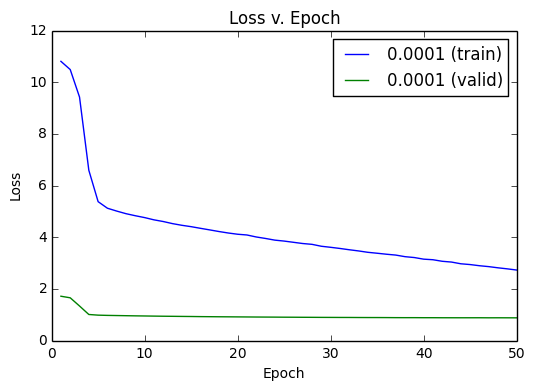

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

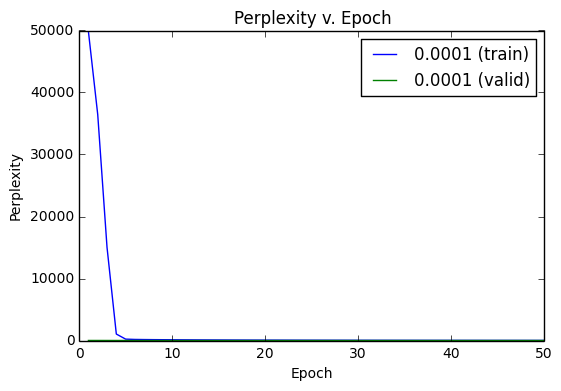

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    print('\n')
    

In [6]:
for sample in report['train_samples']:
    print_sample(sample)

Input:  salmon burger with baby spinach

Gend:  <beg> preheat oven to 350 degrees . <step> in a large skillet over medium heat . <step> add the and add to a large skillet over medium heat

True:  preheat oven to 350 degrees f ( 175 degrees c ) . <step> bring a large pot of lightly <end>



Input:  chocolate pancakes

Gend:  <beg> preheat oven to 350 degrees . <step> in a large skillet over medium heat . <step> add the and add to a large skillet over medium heat

True:  heat a medium sized skillet to medium heat . when hot , add olive oil and then <end>



Input:  tremendously delicious marinated steak

Gend:  <beg> preheat oven to 350 degrees . <step> in a large skillet over medium heat . <step> add the and add to a large skillet over medium heat

True:  in a microwave safe dish ( bowl preferred ) , place a thin layer of the chips . <step> <end>



Input:  yakitori 焼き鳥

Gend:  <beg> preheat oven to 350 degrees . <step> in a large skillet over medium heat . <step> add the and add to a l

In [7]:
for sample in report['valid_samples']:
    print_sample(sample)

Input:  <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2> <UNK2>

Gend:  <beg> preheat oven to 350 degrees . <step> in a large skillet over medium heat . <step> add the and add to a large skillet over medium heat

True:  in a large skillet , cook sausage over medium heat , stirring occasionally , until no pink remains . drain and <end>



Input:  <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask>

Gend:  <beg> preheat oven to 350 degrees . <step> in a large skillet over medium heat . <step> add the and add to a large skillet over medium heat

True:  preheat an oven to 375f ° . lightly grease two 6 - oz . ramekins with the 1 tsp . <end>



Input:  <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask>

Gend:  <beg> preheat oven to 350 degrees . <step> in a large skillet over medium heat . <step> add the and add to a large skillet over medium heat

True:  in a food processor , pulse 1 bun until fine crumbs form ( you should have about 1 / 4 

In [8]:
for sample in report['test_samples']:
    print_sample(sample)

Input:  mussels with thyme and shallots

Gend:  <beg> preheat oven to 350 degrees . <step> in a large skillet over medium heat . <step> add the and add to a large skillet over medium heat

True:  place beans in a colander , rinse well , and remove any stones or shriveled beans <end>



Input:  french fry stuffed chili enchiladas

Gend:  <beg> preheat oven to 350 degrees . <step> in a large skillet over medium heat . <step> add the and add to a large skillet over medium heat

True:  preheat oven to 350 degrees . in a medium bowl , whisk together flours and baking powder ; set aside . <step> in <end>



Input:  steak with cucumber and radish salsa

Gend:  <beg> preheat oven to 350 degrees . <step> in a large skillet over medium heat . <step> add the and add to a large skillet over medium heat

True:  bring a large pot of lightly salted water to a boil . add pasta and cook for 8 <end>



Input:  cheese crusted apple pie

Gend:  <beg> preheat oven to 350 degrees . <step> in a large skillet

### BLEU Analysis

In [9]:
print 'Overall Score: ', report['bleu']['score'], '\n'
print '1-gram Score: ', report['bleu']['components']['1']
print '2-gram Score: ', report['bleu']['components']['2']
print '3-gram Score: ', report['bleu']['components']['3']
print '4-gram Score: ', report['bleu']['components']['4']

Overall Score:  8.48 

1-gram Score:  23.6
2-gram Score:  11.1
3-gram Score:  5.6
4-gram Score:  3.6


### N-pairs BLEU Analysis

This analysis randomly samples 1000 pairs of generations/ground truths and treats them as translations, giving their BLEU score. We can expect very low scores in the ground truth and high scores can expose hyper-common generations

In [10]:
npairs_generated = report['n_pairs_bleu_generated']
npairs_gold = report['n_pairs_bleu_gold']
print 'Overall Score (Generated): ', npairs_generated['score'], '\n'
print '1-gram Score: ', npairs_generated['components']['1']
print '2-gram Score: ', npairs_generated['components']['2']
print '3-gram Score: ', npairs_generated['components']['3']
print '4-gram Score: ', npairs_generated['components']['4']

print '\n'

print 'Overall Score: (Gold)', npairs_gold['score'], '\n'
print '1-gram Score: ', npairs_gold['components']['1']
print '2-gram Score: ', npairs_gold['components']['2']
print '3-gram Score: ', npairs_gold['components']['3']
print '4-gram Score: ', npairs_gold['components']['4']

Overall Score (Generated):  100 

1-gram Score:  100
2-gram Score:  100
3-gram Score:  100
4-gram Score:  100


Overall Score: (Gold) 13.49 

1-gram Score:  30.9
2-gram Score:  16
3-gram Score:  10.1
4-gram Score:  6.6


### Alignment Analysis

This analysis computs the average Smith-Waterman alignment score for generations, with the same intuition as N-pairs BLEU, in that we expect low scores in the ground truth and hyper-common generations to raise the scores

In [11]:
print 'Average Generated Score: ', report['average_alignment_generated']
print 'Average Gold Score: ', report['average_alignment_gold']

Average Generated Score:  140
Average Gold Score:  28.3071895425
